# 2024 OIBC Challenge
## (Deep Learning version skeleton 03)

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import os
from datetime import datetime, timedelta
from tqdm import tqdm

### 데이터 전처리

In [10]:
print(os.getcwd())  # 현재 작업 경로 출력

/content


actual_weather_1

In [11]:
# 데이터 불러오기
actual_weather_1 = pd.read_csv("/content/actual_weather_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
actual_weather_1['datetime'] = pd.to_datetime(actual_weather_1['ts'], unit='s')
actual_weather_1['datetime'] = actual_weather_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거
actual_weather_1.drop(columns=['ts'], inplace=True)
actual_weather_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
actual_weather_1 = actual_weather_1.groupby(['datetime'], as_index=False).mean()


# weather_forecast에 없는 columns 제거
actual_weather_1.drop(columns=['real_feel_temp_shade'], inplace=True)
actual_weather_1.drop(columns=['pressure'], inplace=True)
actual_weather_1.drop(columns=['appr_temp'], inplace=True)
actual_weather_1.drop(columns=['wind_chill_temp'], inplace=True)

# 결과 확인
actual_weather_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-01 00:00:00,8.500000,8.000000,81.000000,5.500000,270.000000,6.100000,17.600000,0.0,20.900000,91.000000,579.000000,7.100000,0.100000
1,2024-03-01 01:00:00,7.158333,3.041667,72.666667,2.508333,234.666667,20.483333,26.366667,0.0,20.783333,97.750000,693.416667,5.091667,0.008333
2,2024-03-01 02:00:00,6.477778,2.111111,75.666667,2.433333,262.888889,21.944444,27.433333,0.0,20.033333,86.333333,616.222222,4.733333,0.011111
3,2024-03-01 03:00:00,6.045455,0.900000,74.545455,1.663636,213.000000,22.490909,27.645455,0.0,19.900000,62.818182,8692.363636,4.209091,0.136364
4,2024-03-01 04:00:00,5.430000,-0.090000,68.100000,-0.030000,256.800000,26.140000,42.440000,0.0,23.800000,38.100000,10911.800000,3.180000,0.410000


actual_weather_2

In [12]:
# 데이터 불러오기
actual_weather_2 = pd.read_csv("/content/actual_weather_2.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
actual_weather_2['datetime'] = pd.to_datetime(actual_weather_2['ts'], unit='s')
actual_weather_2['datetime'] = actual_weather_2['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거
actual_weather_2.drop(columns=['ts'], inplace=True)
actual_weather_2.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
actual_weather_2 = actual_weather_2.groupby(['datetime'], as_index=False).mean()

# 결과 확인
actual_weather_2.head()

,datetime,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow
0,2024-03-01 00:00:00,89.333333,6.146667,6.146667,6.146667,74.666667,1022.666667,8.553333,345.333333,0.17,0.0
1,2024-03-01 01:00:00,83.500000,6.255000,6.255000,6.255000,70.500000,1022.500000,6.256667,342.000000,0.00,0.0
2,2024-03-01 02:00:00,84.333333,5.926667,5.926667,5.926667,67.833333,1022.833333,7.291667,343.000000,0.21,0.0
3,2024-03-01 03:00:00,83.666667,5.198333,5.198333,5.198333,63.833333,1023.500000,7.520000,342.333333,0.00,0.0
4,2024-03-01 04:00:00,42.166667,4.433333,4.433333,4.433333,64.833333,1023.833333,7.330000,342.000000,0.00,0.0


weather_forecast

In [13]:
# 데이터 불러오기
weather_forecast_1 = pd.read_csv("/content/weather_forecast_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
weather_forecast_1['datetime'] = pd.to_datetime(weather_forecast_1['ts'], unit='s')
weather_forecast_1['datetime'] = weather_forecast_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열 제거, 'base_ts' 열 제거, 'location' 제거
weather_forecast_1.drop(columns=['ts'], inplace=True)
weather_forecast_1.drop(columns=['base_ts'], inplace=True)
weather_forecast_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
weather_forecast_1 = weather_forecast_1.groupby(['datetime'], as_index=False).mean()


# 예보 데이터의 columns 순서를 actual_weather columns 순서와 맞추기
weather_forecast_1 = weather_forecast_1[['datetime', 'temp', 'real_feel_temp', 'rel_hum',
       'dew_point', 'wind_dir', 'wind_spd', 'wind_gust_spd', 'uv_idx', 'vis',
       'cld_cvr', 'ceiling', 'wet_bulb_temp', 'total_liq']]
weather_forecast_1['precip_1h'] = weather_forecast_1['total_liq']
weather_forecast_1.drop(columns=['total_liq'], inplace=True)

# 결과 확인
weather_forecast_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-02 00:00:00,1.728394,-4.320987,64.333333,-4.320987,335.555556,22.048022,50.604944,0.0,16.093400,75.555556,1700.106667,-0.555556,0.000000
1,2024-03-02 01:00:00,1.851852,-4.506173,64.333333,-4.135800,335.000000,22.048022,50.640711,0.0,15.378140,84.777778,1249.680000,-0.432099,0.056444
2,2024-03-02 02:00:00,1.790123,-5.061728,66.333333,-3.950616,334.444444,22.656000,51.481144,0.0,14.392882,89.333333,1229.360000,-0.370370,0.197556
3,2024-03-02 03:00:00,1.604940,-5.308640,67.333333,-3.888887,333.777778,23.263967,51.463267,0.0,15.195758,94.555556,1933.786667,-0.370370,0.084667
4,2024-03-02 04:00:00,1.851852,-4.876541,66.444444,-3.950616,333.888889,23.871922,50.837400,0.0,15.825200,82.555556,2600.960000,-0.308642,0.000000


elec_supply

In [14]:
# 데이터 불러오기
elec_supply = pd.read_csv("/content/elec_supply.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
elec_supply['datetime'] = pd.to_datetime(elec_supply['ts'], unit='s')
elec_supply['datetime'] = elec_supply['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
elec_supply = elec_supply.groupby(['datetime'], as_index=False).mean()

# 결과 확인
elec_supply.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
elec_supply.head()

,datetime,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,2024-01-01 00:00:00,1.285000e+06,757500.000000,0.0,115593.233333,123350.666667,527166.666667,328500.000000
1,2024-01-01 01:00:00,1.238308e+06,727538.461538,0.0,68802.153846,77036.569231,510692.307692,312692.307692
2,2024-01-01 02:00:00,1.214818e+06,694090.909091,0.0,45923.181818,53740.109091,520727.272727,318545.454545
3,2024-01-01 03:00:00,1.207923e+06,672000.000000,0.0,38567.161538,46614.815385,536000.000000,291000.000000
4,2024-01-01 04:00:00,1.192364e+06,666000.000000,0.0,22849.272727,30575.990909,526363.636364,318272.727273


smp_da

In [15]:
# 데이터 불러오기
smp_da = pd.read_csv("/content/smp_da.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_da['datetime'] = pd.to_datetime(smp_da['ts'], unit='s') + timedelta(hours=9)

# 결과 확인
smp_da.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_da.head()

,하루전가격(원/kWh),datetime
0,107.39,2024-03-01 00:00:00
1,107.39,2024-03-01 01:00:00
2,95.30,2024-03-01 02:00:00
3,87.89,2024-03-01 03:00:00
4,0.00,2024-03-01 04:00:00


smp_rt_rc

In [16]:
# 데이터 불러오기
smp_rt_rc = pd.read_csv("/content/smp_rt_rc.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_rt_rc['datetime'] = pd.to_datetime(smp_rt_rc['ts'], unit='s')
smp_rt_rc['datetime'] = smp_rt_rc['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
smp_rt_rc = smp_rt_rc.groupby(['datetime'], as_index=False).mean()

# 결과 확인
smp_rt_rc.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_rt_rc.head()

,datetime,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,2024-03-01 00:00:00,95.30,95.30
1,2024-03-01 01:00:00,107.39,107.39
2,2024-03-01 02:00:00,95.30,95.30
3,2024-03-01 03:00:00,87.89,87.89
4,2024-03-01 04:00:00,86.50,86.50


##### X 데이터

- 제주 기상 실측 (n+1)
- 하루 전 시장 전기 예측 (n)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [17]:
actual_weather_1
actual_weather_2
weather_forecast_1['datetime']
smp_da_x = smp_da.copy()
smp_da_x['datetime'] += pd.Timedelta(days=1)
smp_rt_rc['datetime'] += pd.Timedelta(days=2)
elec_supply['datetime'] += pd.Timedelta(days=2)

In [18]:
dfs = [actual_weather_1, actual_weather_2, smp_da_x, smp_rt_rc, elec_supply]

X = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='outer'), dfs)

In [39]:
X

,datetime,temp_x,real_feel_temp,rel_hum,dew_point,wind_dir_x,wind_spd,wind_gust_spd,uv_idx,vis,...,하루전가격(원/kWh),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
49,2024-03-03 01:00:00,0.044626,0.057254,0.377728,0.020098,0.760461,0.461116,0.295624,0.0,0.780269,...,0.532294,0.455524,0.473715,0.519772,0.441719,0.000000,0.712882,0.471220,0.504400,0.260338
50,2024-03-03 02:00:00,0.040292,0.039424,0.401139,0.026262,0.758318,0.499315,0.267328,0.0,0.750930,...,0.436939,0.426027,0.443041,0.547958,0.406656,0.000000,0.782015,0.514459,0.558343,0.339499
51,2024-03-03 03:00:00,0.034462,0.061179,0.401876,0.023314,0.773191,0.415557,0.235889,0.0,0.693823,...,0.426920,0.407949,0.424240,0.524536,0.402433,0.000000,0.720703,0.475758,0.541870,0.313980
52,2024-03-03 04:00:00,0.042822,0.047265,0.410968,0.034133,0.794294,0.500557,0.336521,0.0,0.784218,...,0.416803,0.404557,0.420713,0.534170,0.415690,0.000000,0.744246,0.490744,0.539098,0.309218
53,2024-03-03 05:00:00,0.063666,0.083038,0.388077,0.038732,0.795893,0.439446,0.230202,0.0,0.670813,...,0.416803,0.410120,0.426498,0.550495,0.431462,0.000000,0.785560,0.516667,0.539212,0.307543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,2024-10-21 20:00:00,0.609380,0.490784,0.840207,0.728155,0.326135,0.386825,0.305673,0.0,0.537675,...,0.460570,0.533351,0.554651,0.437079,0.362857,0.002917,0.642016,0.415043,0.471740,0.246868
5637,2024-10-21 21:00:00,0.619401,0.505537,0.841018,0.737054,0.231190,0.443320,0.259267,0.0,0.440082,...,0.442365,0.442935,0.460623,0.434896,0.307024,0.000000,0.643340,0.413339,0.512957,0.318776
5638,2024-10-21 22:00:00,0.616876,0.518715,0.904554,0.760674,0.209959,0.487694,0.237918,0.0,0.529112,...,0.442487,0.435323,0.452707,0.457761,0.291841,0.000000,0.704207,0.451326,0.565020,0.368288
5639,2024-10-21 23:00:00,0.615488,0.520020,0.905144,0.760578,0.252606,0.477862,0.283488,0.0,0.346786,...,0.439970,0.420465,0.437256,0.476313,0.264351,0.000000,0.744126,0.476426,0.606592,0.320417


##### Y 데이터

- 하루 전 시장 전기 예측 가격(n+1)

In [20]:
Y = smp_da

### 파이토치 모델 구성

##### 날짜 설정

In [21]:
target_date = {
  # 최소 2024-03-04
  "train_start_date": '2024-03-03',
  # 최대 2024-10-22
  "train_end_date": '2024-10-22',
}

In [22]:
X = X.loc[
  (X['datetime'] > target_date['train_start_date']) &
  (X['datetime'] <= target_date['train_end_date'])
]

In [23]:
Y = Y.loc[
  (Y['datetime'] > target_date['train_start_date']) &
  (Y['datetime'] <= target_date['train_end_date'])
]

In [24]:
from datetime import datetime, timedelta

targ = datetime.strptime(target_date['train_start_date'], '%Y-%m-%d') + timedelta(hours=1)
endd = datetime.strptime(target_date['train_end_date'], '%Y-%m-%d')

print(targ, endd)

2024-03-03 01:00:00 2024-10-22 00:00:00


In [25]:
# X 데이터의 특정 시간이 누락되었기 때문에
# Y 데이터에서도 누락된 시간대를 제거한다.

while targ <= endd:
  if not len(X.loc[X['datetime'] == targ]):
    idx = Y[Y['datetime'] == targ].index
    Y.drop(idx, inplace=True)

  targ = targ + timedelta(hours=1)

In [26]:
len(X), len(Y)

(5592, 5592)

##### 모듈 임포트

In [27]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler

In [28]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name())
  print(torch.__version__)
  print(torch.version.cuda)
  x = torch.randn(1).cuda()
  print(x)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

##### Dataset 구성

In [29]:
class ElecDataset(Dataset):
  def __init__(self, x_data, y_data):
    scaler = MinMaxScaler()

    columns_to_scale = x_data.columns[1:]
    x_data[columns_to_scale] = scaler.fit_transform(x_data[columns_to_scale])

    self.x_data = x_data.fillna(0)
    self.y_data = y_data.fillna(0)

  def __getitem__(self, index):
    target_y = self.y_data['하루전가격(원/kWh)'].iloc[index]
    targets = self.x_data.drop(columns='datetime').iloc[index].to_numpy()

    return torch.from_numpy(targets), torch.tensor(target_y)

  def __len__(self):
    return int(len(self.y_data))

In [30]:
dataset = ElecDataset(X, Y)

In [31]:
len(dataset)

5592

##### dataloader 구성

In [32]:
dataloader = DataLoader(dataset=dataset,
                        batch_size=32,
                        shuffle=True,
                        drop_last=False)

##### 모델 구성

In [33]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 128, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(128, 256, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(256, 256, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(256, 256, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(256, 256, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(256, 128, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(128, 32, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(32, 8, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(8, output_size, dtype=torch.float64)
        )

    def forward(self, x):
        out = self.linear_relu_stack(x)

        return out

In [34]:
def customloss(predict, y):#학습용
    predict = predict.squeeze()

    e1 = torch.zeros_like(y)
    e2 = torch.zeros_like(y)
    accuracy = torch.zeros_like(y, dtype=torch.bool)

    positive_mask = y > 0
    negative_mask = y <= 0

    e1_mask = y > 0  # y > 0인 부분 마스크
    e2_mask = y < -1  # y <= 0인 부분 마스크
    e2_adjusted_mask = (y <= 0) & (y >= -1)
    # 각 마스크 조건에 맞는 부분에 대해서만 e1, e2를 계산합니다.
    # e1과 e2에서 분모에 작은 상수를 추가하여 0으로 나누는 것을 방지
    e1[e1_mask] = torch.abs((y[e1_mask] - predict[e1_mask]) / (y[e1_mask]))
    e2[e2_mask] = torch.abs((y[e2_mask] - predict[e2_mask]) / (-y[e2_mask]))
    e2[e2_adjusted_mask] = torch.abs((y[e2_adjusted_mask] - predict[e2_adjusted_mask]) / (-1))

    accuracy[positive_mask] = (predict[positive_mask] > 0)
    accuracy[negative_mask] = (predict[negative_mask] <= 0)

    e1_mean = e1[e1 != 0].mean() if (e1 != 0).any() else torch.tensor(0.0)
    e2_mean = e2[e2 != 0].mean() if (e2 != 0).any() else torch.tensor(0.0)

    accuracy_mean = accuracy.float().mean()

    e_F = 0.2 * e1_mean + 0.8 * e2_mean - (accuracy_mean - 0.95)
    if e_F<0:
      e_F=0
    e_F_square = e_F**2
    mse_loss = torch.mean((y - predict)**2)

    return e_F_square*10+mse_loss

In [35]:
input_size = len(X.columns) - 1  # Number of input features
output_size = 1  # Single output


model = NeuralNetwork(input_size, output_size)


criterion = customloss # nn.MSELoss()

##### 학습

In [36]:
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    model = model.to(device)  # Move model to GPU/CPU

    train_history = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode

        running_loss = 0.0  # To keep track of loss
        for inputs, targets in tqdm(train_loader, ncols=100):

            # Move data to the same device as the model
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)

            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()  # Clear the gradients
            loss.backward()        # Compute gradients
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()        # Update model parameters

            running_loss += loss.item()

            # print(loss.item())

        # Print the loss after each epoch
        avg_loss = running_loss / len(train_loader)
        train_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    print("Training complete.")
    return model, train_history

##### 하이퍼 파라미터

In [50]:
learning_rate = 0.000001
epoches=20

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [51]:
model, train_history = train(model, dataloader, criterion, optimizer, epoches, device)

100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.70it/s]


Epoch [1/20], Loss: 2389.0916


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.55it/s]


Epoch [2/20], Loss: 2340.1614


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.51it/s]


Epoch [3/20], Loss: 2365.5127


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.64it/s]


Epoch [4/20], Loss: 2371.9339


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.63it/s]


Epoch [5/20], Loss: 2526.1885


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.52it/s]


Epoch [6/20], Loss: 2252.1399


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.55it/s]


Epoch [7/20], Loss: 2434.0437


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.67it/s]


Epoch [8/20], Loss: 2280.5953


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.51it/s]


Epoch [9/20], Loss: 2307.4071


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.62it/s]


Epoch [10/20], Loss: 2667.8446


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.71it/s]


Epoch [11/20], Loss: 2697.9802


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.05it/s]


Epoch [12/20], Loss: 2424.4606


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.04it/s]


Epoch [13/20], Loss: 2349.2022


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.01it/s]


Epoch [14/20], Loss: 2319.6182


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.62it/s]


Epoch [15/20], Loss: 2449.5566


100%|█████████████████████████████████████████████████████████████| 175/175 [00:14<00:00, 12.17it/s]


Epoch [16/20], Loss: 2624.0339


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.72it/s]


Epoch [17/20], Loss: 2719.0863


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.69it/s]


Epoch [18/20], Loss: 2669.1063


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.70it/s]


Epoch [19/20], Loss: 2358.8606


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.75it/s]

Epoch [20/20], Loss: 2279.8559
Training complete.


학습 loss

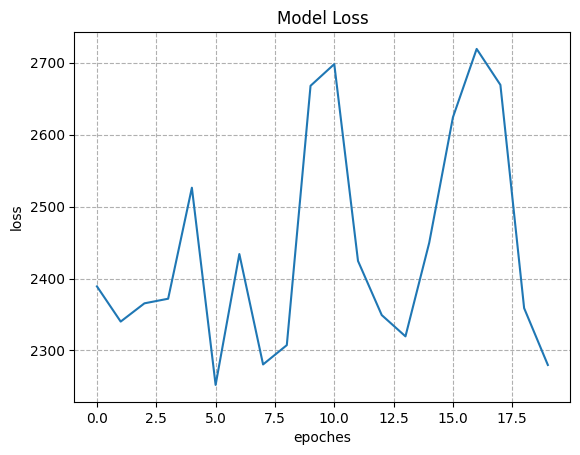

In [52]:
plt.plot(train_history)

plt.title('Model Loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.grid(True, linestyle='--')

plt.show()

In [ ]:
torch.save(model.state_dict(), 'model4.pth')

### 예측

In [53]:
test_target_date = {
  # 최소 2024-10-25
  "start_date": '2024-10-25',
  # 최대 2024-11-07
  "end_date": '2024-11-07',
}

predict_target_date = '2024-11-06'

##### 모델 불러오기

In [54]:
model_test = NeuralNetwork(input_size, output_size)

model_test.to(device)

model_test.load_state_dict(torch.load('model4.pth'))

<ipython-input-54-15d56836c7b3>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load('model4.pth'))


FileNotFoundError: [Errno 2] No such file or directory: 'model4.pth'

##### X 데이터

- 제주 기상 실측 (n+1)
- 하루 전 시장 전기 예측 (n)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [55]:
dfs = [weather_forecast_1, smp_da_x, smp_rt_rc, elec_supply]

test_data = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='inner'), dfs)

target_day = datetime.strptime(predict_target_date, '%Y-%m-%d')

target_data = test_data.loc[
  (test_data['datetime'] > target_day) &
  (test_data['datetime'] <= target_day + timedelta(days=1))
]

test_data = test_data.loc[
  (test_data['datetime'] > datetime.strptime(test_target_date['start_date'], '%Y-%m-%d')) &
  (test_data['datetime'] <= datetime.strptime(test_target_date['end_date'], '%Y-%m-%d') + timedelta(days=1))
]

In [56]:
test_data

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,...,하루전가격(원/kWh),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
5577,2024-10-25 01:00:00,18.271589,16.543222,65.777778,11.790110,73.222222,15.664311,25.731622,0.0,16.0934,...,92.57,97.078000,97.078000,1.242000e+06,552615.384615,0.000000,236260.076923,244775.846154,684384.615385,223846.153846
5578,2024-10-25 02:00:00,18.456789,16.728389,68.777778,12.592600,70.888889,15.449733,26.357467,0.0,16.0934,...,204.70,133.896667,133.896667,1.240000e+06,524181.818182,0.000000,236084.090909,244635.090909,710818.181818,217181.818182
5579,2024-10-25 03:00:00,18.950611,17.098756,70.888889,13.395044,68.666667,15.664311,27.376733,0.0,16.0934,...,0.00,122.590000,122.590000,1.228769e+06,509769.230769,0.000000,248816.769231,257309.923077,714230.769231,210846.153846
5580,2024-10-25 04:00:00,18.950611,17.222222,72.555556,13.888878,67.111111,15.664311,27.573433,0.0,16.0934,...,0.00,30.783333,30.783333,1.223909e+06,502545.454545,0.000000,244287.363636,252679.909091,716454.545455,212363.636364
5581,2024-10-25 05:00:00,19.135778,17.407422,74.000000,14.444433,65.888889,16.093467,28.431744,0.0,16.0934,...,0.00,0.000000,0.000000,1.222077e+06,504923.076923,0.000000,239023.153846,247333.615385,703769.230769,208230.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5908,2024-11-07 20:00:00,15.370378,15.493833,72.333333,10.432126,102.000000,5.793637,13.822498,0.0,16.0934,...,117.52,127.580000,127.580000,1.244889e+06,705000.000000,6775.994444,303707.222222,310726.888889,540111.111111,366888.888889
5909,2024-11-07 21:00:00,15.493844,15.308656,73.222222,10.802470,105.555556,7.438751,16.272251,0.0,16.0934,...,117.53,119.556000,119.556000,1.236917e+06,670750.000000,4554.705833,298021.500000,302820.333333,566166.666667,391166.666667
5910,2024-11-07 22:00:00,15.123444,14.876556,77.333333,11.111110,111.666667,7.027472,16.272253,0.0,16.0934,...,113.81,106.686667,106.686667,1.243364e+06,648818.181818,1637.663636,306868.272727,308800.000000,594727.272727,407818.181818
5911,2024-11-07 23:00:00,15.493833,15.246944,77.111111,11.543210,117.111111,7.027472,16.683544,0.0,16.0934,...,113.61,105.064000,105.064000,1.223077e+06,625307.692308,0.000000,288086.538462,288662.615385,597615.384615,410384.615385


In [57]:
target_data

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,...,하루전가격(원/kWh),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
5865,2024-11-06 01:00:00,12.222216,8.580243,63.777778,5.555557,83.555556,23.496410,40.770044,0.000000,16.0934,...,103.72,97.400000,97.400000,1.032077e+06,497000.000000,0.000000,614.893000,908.781846,484692.307692,263769.230769
5866,2024-11-06 02:00:00,12.037027,8.209879,64.555556,5.493828,83.888889,23.710999,42.200578,0.000000,16.0934,...,92.74,87.493333,87.493333,1.032273e+06,472363.636364,0.000000,279.042545,660.190636,509636.363636,263090.909091
5867,2024-11-06 03:00:00,11.728404,7.716048,65.777778,5.493828,84.333333,24.318967,43.863567,0.000000,16.0934,...,87.46,87.232000,87.232000,1.033000e+06,455923.076923,0.000000,359.823769,739.888923,526692.307692,280307.692308
5868,2024-11-06 04:00:00,11.851849,7.777776,65.777778,5.617286,85.333333,25.534900,46.295478,0.000000,16.0934,...,87.49,87.056667,87.056667,1.033000e+06,449818.181818,0.000000,395.955182,753.233091,532909.090909,286636.363636
5869,2024-11-06 05:00:00,12.283944,8.086418,65.333333,5.864200,86.555556,26.357464,48.566444,0.000000,16.0934,...,0.00,93.358000,93.358000,1.032538e+06,456923.076923,0.000000,424.759769,579.875692,525538.461538,317230.769231
5870,2024-11-06 06:00:00,12.530867,8.271609,65.000000,6.172839,87.888889,27.805889,51.463267,0.000000,16.0934,...,0.00,103.040000,103.040000,1.033182e+06,485909.090909,0.000000,1130.962182,1256.141364,497090.909091,374727.272727
5871,2024-11-06 07:00:00,12.592600,8.271609,65.555556,6.296296,201.111111,28.628433,53.716356,0.000000,16.0934,...,104.21,108.796000,108.796000,1.068308e+06,517923.076923,817.756154,634.594462,1659.884692,500230.769231,377461.538462
5872,2024-11-06 08:00:00,12.901233,8.950614,64.666667,6.358027,202.222222,30.058956,55.772744,0.666667,16.0934,...,106.62,120.953333,120.953333,1.117000e+06,528636.363636,35087.402727,1179.212818,36390.738182,544454.545455,415727.272727
5873,2024-11-06 09:00:00,13.580233,9.938277,61.444444,6.419756,203.222222,31.918644,57.811233,1.333333,16.0934,...,117.37,136.718000,136.778000,1.204154e+06,545692.307692,126945.684615,417.556692,127487.646154,638692.307692,438461.538462
5874,2024-11-06 10:00:00,14.691356,11.851853,57.666667,6.358027,164.888889,30.058956,55.379333,2.111111,16.0934,...,136.94,145.696667,145.696667,1.278727e+06,554272.727273,205438.181818,516.134182,206078.272727,707363.636364,448181.818182


In [58]:
predict_set = ElecDataset(target_data, Y.iloc[:24])

predict_dataloader = DataLoader(dataset=predict_set,
                        batch_size=24,
                        shuffle=False)

In [59]:
model_test.eval()

with torch.no_grad():
  for inputs, _ in predict_dataloader:
    inputs = inputs.to(device)
    predictions = model_test(inputs)

print(predictions)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (24x23 and 33x128)

In [ ]:
flattened_list = predictions.view(-1).tolist()

print(flattened_list)

[48.38631505293676, 23.005973960717693, 34.217638988637816, 11.944968836991217, 0.16527934959309706, 0.15879514867054859, 13.807067091053092, 7.123467942354658, 14.574186157796623, 115.49275208362772, 90.96667681917637, 16.88759418306925, 109.8845291373479, 17.12711848971751, 19.60319666300659, 127.64268845880426, 145.41450350546026, 152.64423038512146, 181.55426151302612, 182.63773958986192, 170.13953061311832, 160.05004599324383, 165.9349882419516, 147.7900538802053]


##### 분석

예측결과

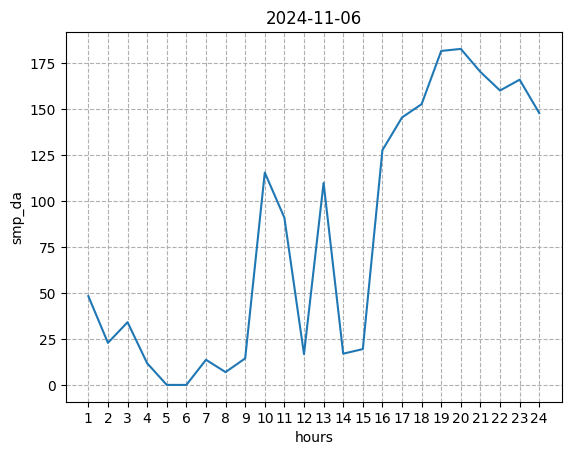

In [ ]:
plt.plot(list(range(1, 25)), flattened_list)

plt.title(predict_target_date)
plt.xlabel('hours')
plt.ylabel('smp_da')
plt.xticks(list(range(1,25, 1)))
plt.grid(True, linestyle='--')

plt.show()